In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("TSLA.csv")
df.head()
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,64.594124,65.883341,63.272302,64.642060,64.642060,3.979012e+07
std,33.400757,34.457933,32.308613,33.518742,33.518742,2.928062e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,3.540000e+06
25%,45.861999,46.425002,45.063001,45.887001,45.887001,2.158075e+07
50%,56.765999,57.888000,55.776001,56.945999,56.945999,3.081300e+07
75%,67.962001,69.039001,66.736000,67.790001,67.790001,4.658400e+07
max,281.002014,285.899994,270.256012,278.855988,278.855988,3.046940e+08


In [4]:
# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]
 
df.head()

,ds,y
0,2015-07-10,51.830002
1,2015-07-13,52.431999
2,2015-07-14,53.130001
3,2015-07-15,52.627998
4,2015-07-16,53.335999


In [5]:
# split data frame  into two parts train and test
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [6]:
# Instantiate prophet
model = fbp.Prophet()
# fit the training data
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.2592


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2170.75     0.0271861       183.997           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2195.31    0.00496201       100.605      0.7066      0.7066      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2202.16     0.0017325       132.316      0.9274      0.9274      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       2205.69   0.000414836        190.35   2.145e-06       0.001      429  LS failed, Hessian reset 
     399       2212.71   1.01117e-05       67.2327      0.6734      0.6734      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     447       2213.12   0.000271444        78.876   3.462e-06       0.001      6

In [7]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
240,2020-07-02,26.908492,12.727897,41.463227,14.472918,39.658080,0.607529,0.607529,0.607529,-0.299518,-0.299518,-0.299518,0.907047,0.907047,0.907047,0.0,0.0,0.0,27.516022
241,2020-07-06,26.674397,12.519364,41.168156,14.009731,39.590896,0.096959,0.096959,0.096959,-0.215886,-0.215886,-0.215886,0.312845,0.312845,0.312845,0.0,0.0,0.0,26.771356
242,2020-07-07,26.615873,12.436351,41.125134,13.874493,39.610753,-0.076208,-0.076208,-0.076208,-0.284031,-0.284031,-0.284031,0.207823,0.207823,0.207823,0.0,0.0,0.0,26.539665
243,2020-07-08,26.557349,12.569497,41.526707,13.735955,39.603840,-0.042712,-0.042712,-0.042712,-0.166227,-0.166227,-0.166227,0.123515,0.123515,0.123515,0.0,0.0,0.0,26.514637
244,2020-07-09,26.498825,11.553173,40.588452,13.602903,39.594902,-0.238658,-0.238658,-0.238658,-0.299518,-0.299518,-0.299518,0.060860,0.060860,0.060860,0.0,0.0,0.0,26.260167


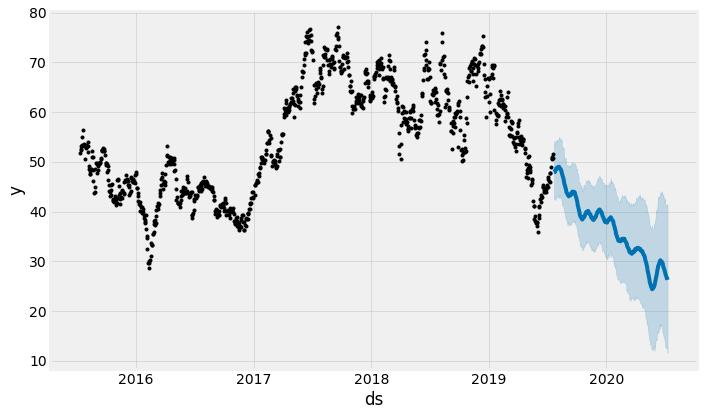

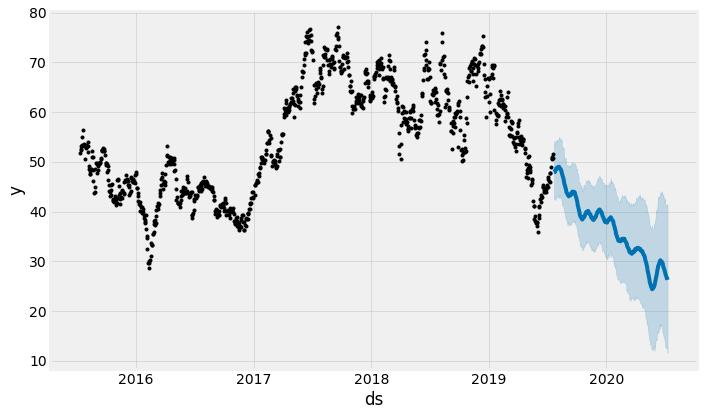

In [8]:
model.plot(forecast)

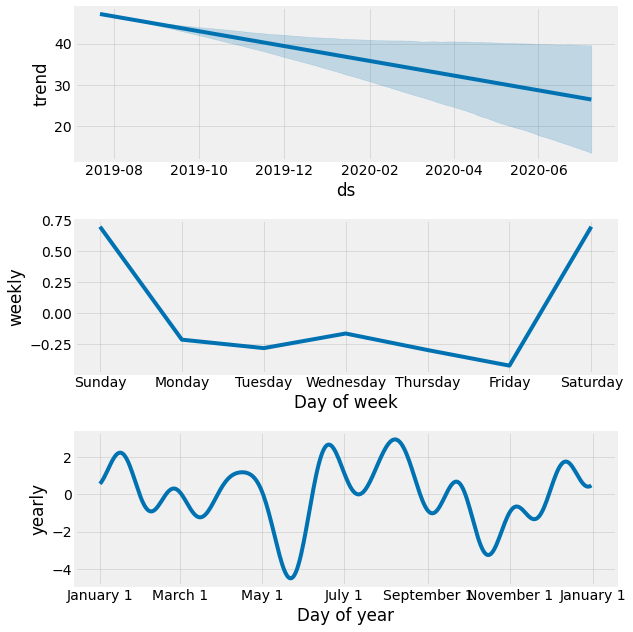

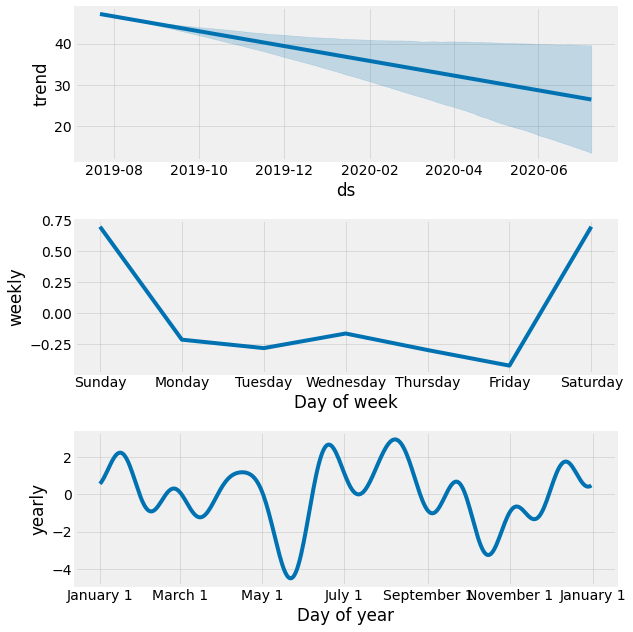

In [9]:
# plot graphs of different components:
model.plot_components(forecast)

In [10]:
# code
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 8615.43949440306
Mean Absolute Error (MAE): 69.95855619701683


Now, we calculate the mean absolute percentage error of our forecast, because it gives a better idea about how accurate our prediction is

In [11]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  51.93381087145118
